Read and Display Horse or Human machine learning dataset

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

2025-03-21 12:43:42.759924: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-21 12:43:42.760337: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 12:43:42.762356: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 12:43:42.768110: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742557422.778148   22971 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742557422.78

In [2]:
# Load the horse or human dataset
#(300, 300, 3) unint8
dataset, label = tfds.load('horses_or_humans', with_info=True)

2025-03-21 12:43:44.449864: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
# Extract the horse/human class
horse_ds = dataset['train'].filter(lambda x: x['label'] == 0)
human_ds = dataset['train'].filter(lambda x: x['label'] == 1)

In [4]:
# Take a few examples < 16
n_examples = 5
horse_examples = horse_ds.take(n_examples)
human_examples = human_ds.take(n_examples)

2025-03-21 12:43:44.620785: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-03-21 12:43:44.637090: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-03-21 12:43:44.638810: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


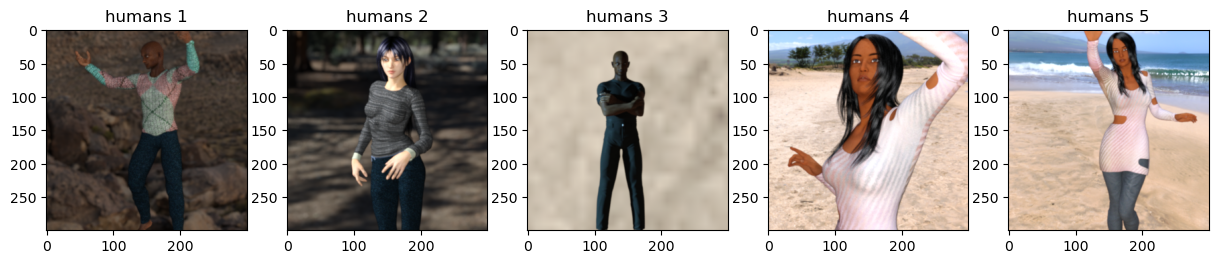

2025-03-21 12:43:44.980654: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-03-21 12:43:44.982228: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


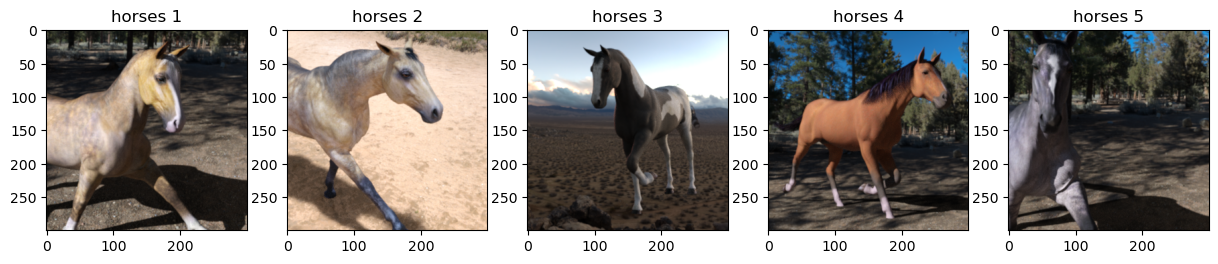

In [5]:
# Display the examples
fig, axes = plt.subplots(1, n_examples, figsize=(15, 15))
for i, example in enumerate(human_examples):
    image = example['image']
    axes[i].imshow(image)
    axes[i].set_title(f"humans {i+1}")
plt.show()

fig, axes = plt.subplots(1, n_examples, figsize=(15, 15))
for i, example in enumerate(horse_examples):
    image = example['image']
    axes[i].imshow(image)
    axes[i].set_title(f"horses {i+1}")
plt.show()


In [6]:
# Split the dataset into training and validation sets
# as_supervised: Specifies whether to return the dataset as a tuple
# of (input, label) pairs.
train_dataset, valid_dataset = tfds.load('horses_or_humans', split=['train','test'], as_supervised=True)

In [7]:
# Get the number of elements in the training and validation dataset
train_size = tf.data.experimental.cardinality(train_dataset).numpy()
valid_size = tf.data.experimental.cardinality(valid_dataset).numpy()
print("Training dataset size:", train_size)
print("Validation dataset size:", valid_size)

Training dataset size: 1027
Validation dataset size: 256


In [8]:
IMG_SIZE = 300
NUM_CLASSES = 2

def preprocess(image, label):
    image = tf.cast(image, tf.float32)
#    # Resize the images to a fixed size
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
#    # Rescale the pixel values to be between 0 and 1
    image = image / 255.0
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

In [9]:
# Apply the preprocessing function to the datasets
train_dataset = train_dataset.map(preprocess)
valid_dataset = valid_dataset.map(preprocess)

# Batch and shuffle the datasets
train_dataset = train_dataset.shuffle(1000).batch(80)
valid_dataset = valid_dataset.batch(20)

In [10]:
# Store images and labels of the validation data for predictions
for images, labels in valid_dataset:
    x_val = images
    y_val = labels
    
print(x_val.shape, y_val.shape)

(16, 300, 300, 3) (16, 2)
